# MNIST With Pytorch: First steps
In this notebook, we aim to learn the basics of PyTorch for computer vision using the famous MNIST dataset—an image classification task involving handwritten digits (0 to 9).

## The Data
To pull the data, we need to go through the following steps:
1. Download the dataset;
2. Divide in training and test data(for further validation);
3. Preprocessing;

### 1. Download the dataset
MNIST is alwready availabel with *torchvision.datasets*. It can be downloaded with the `datasets.MNIST` class. With this class, we can use a handy pipeline that downloads MNIST, saves it at a local directory, defines if it is for training or validation, and apply a preprocessing.

### 2. Divide in training and test data
It is necessary to divide the dataset into training part and test part to ensure that no test data interferes with training (causing data leakage). To do this, we can use the `DataLoader` class, passing the data, the batch size (for further training) and shuffle to training data. Shuffle is important to garantee that the model will not learn a sequential pattern of the dataset.

### 3. Preprocessing
With this dataset, we applied a pipeline with `ToTensor()` to transform image data to tensors with values between [0, 1], and `Normalize((0,), (1,))` to normalize with **mean=0** and **std=1** (a commum practice to speed up traning).

In [50]:

# Imports
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Defines transform pipeline
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0,), (1,))
])

# Download and transform
train_dataset = datasets.MNIST(
    root='./data', train=True, download=True, transform=transform
)
test_dataset = datasets.MNIST(
    root='./data', train=False, download=True, transform=transform
)

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

## Visualizing
We can use matplotlib to visualize some example images.

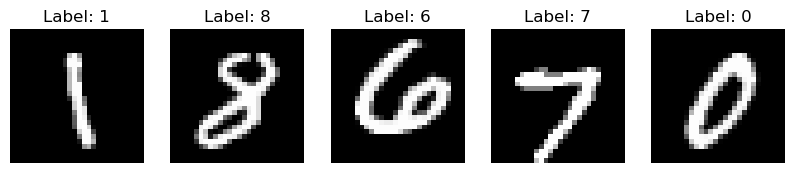

In [51]:
import matplotlib.pyplot as plt

# Function to plot images with its lables
def show_images(images, labels):
    fig, axes = plt.subplots(1, len(images), figsize=(10, 2))
    for img, label, ax in zip(images, labels, axes):
        ax.imshow(img.squeeze(), cmap='gray')
        ax.set_title(f'Label: {label}')
        ax.axis('off')
    plt.show()

# Get a batch of images from the training data loader
data_iter = iter(train_loader)
images, labels = next(data_iter)

# Display the first 5 images with its labels
show_images(images[:5], labels[:5])

## Defining a Neural Network
In Pytorch, a model (in our case a neural network) is defined by a class that inherits `nn.Module`. This class works like a blueprint for a pytorch model and requires at least `__init__()` and `foward()` method implementations.

### The constructor
In `__init__()` we can define the layers of our model. In this example, we used the following architecture:

- **1º Layer:** A fully connected layer (defined by `nn.Linear` class) for feature extraction **[784 -> 128]**;<br>
- **ReLU:** A activation function for non-linearity **[128 -> 128]**;<br>
- **2º Layer:** A fully connected layer for final classess features **[128 -> 10]**; <br>
- **Softamx:** A activation function to classify the image **[10 -> 10]**.




In [ ]:
import torch.nn as nn

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)
        self.softmax = nn.LogSoftmax(dim=1)
    
    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return self.softmax(x)

model = SimpleNN()

## Metrics

In [53]:
import torch.optim as optim

# Define loss function and optimizer
criterion = nn.NLLLoss()  # Negative Log-Likelihood Loss
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

## Training 

In [54]:
# Training loop
epochs = 5
for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(train_loader)}')

print("Training complete!")

Epoch 1, Loss: 0.46601869347793207
Epoch 2, Loss: 0.22893040021583597
Epoch 3, Loss: 0.17297790620499837
Epoch 4, Loss: 0.13899957001415778
Epoch 5, Loss: 0.1164374014795589
Training complete!


# Validation

In [47]:
# Evaluate the model
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy on test set: {accuracy:.2f}%')

Accuracy on test set: 92.27%


## Next Steps
- Implement a MNIST solution with CNNs
- Implement a solution for another dataset